In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
#from matplotlib.animation import FuncAnimation

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
plt.rcParams['figure.figsize'] = [3, 2]
plt.rcParams['figure.dpi'] = 200

# Animated scatter plot

# make random simulation of things moving around in a circle

In [6]:
coords = 2*(np.random.rand(100, 2) - 0.5)

n_steps = 1000
dt = 0.01
sigma = 0.1
gamma = 0.01

trajectory = np.zeros((n_steps, *coords.shape))
trajectory[0] = coords

for t in range(1, n_steps):
    trajectory[t] = trajectory[t-1] + dt*trajectory[t-1, :, ::-1]*np.asarray([[-1,1]]) - gamma*trajectory[t-1]*dt + np.sqrt(dt)*sigma*np.random.randn(*coords.shape)
    # periodic BC
    #trajectory[t, trajectory[t]>1] -= 1
    #trajectory[t, trajectory[t]<-1] += 1

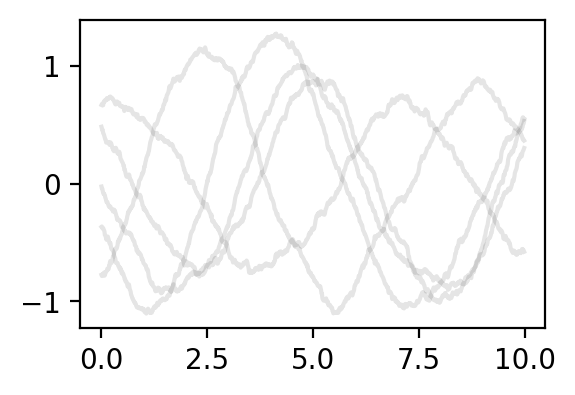

In [7]:
for i in range(5):
    plt.plot(np.arange(n_steps)*dt, trajectory[:,i,0], color='k', alpha=0.1)


In [8]:
HTML(plot_scatter_and_line(trajectory[:100], interval=20, lineclr='k', linealpha=0.1).to_html5_video())

In [4]:

def plot_scatter_and_line(coord_list, lineclr = 'k', linealpha=0.99, interval=20):
    def init():
        scat.set_offsets(coord_list[0]) # takes Nx2 array

        for l, line in enumerate(lines):
            line.set_data([coord_list[0, l, 0]], [coord_list[0, l, 1]])
        
        return (*lines, scat)
    
    def animate(i):
        scat.set_offsets(coord_list[i])
        
        for l, line in enumerate(lines):
            line.set_data(coord_list[:i, l, 0], coord_list[:i, l, 1])
        
        return (*lines, scat)

    fig, ax = plt.subplots(1,1, figsize=(3, 3), dpi=200)
        
    lines = []
    for l in range(coord_list.shape[1]):
        line, = ax.plot(coord_list[0,l,0], coord_list[0,l,1], color=lineclr, alpha=linealpha)
        lines.append(line)
        
    scat = ax.scatter(coord_list[0,:,0], coord_list[0,:,1], color=lineclr, s=10)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_box_aspect(1)

    plt.close();
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(coord_list), interval=interval, blit=True)
    return anim


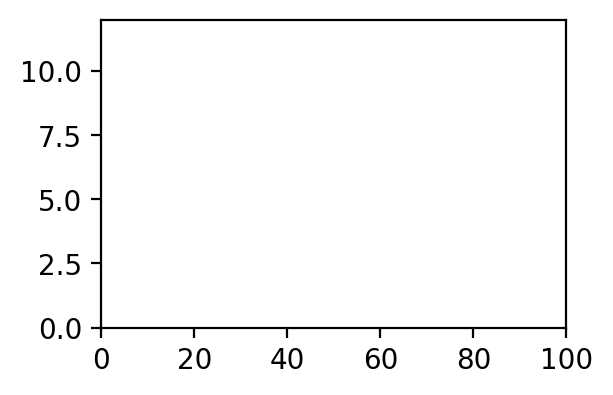

In [10]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Initialize x and y lists
x = []
y = []

# Create a figure and axis object
fig, ax = plt.subplots()

# Set limits for x and y axis
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)

# Initialize a line object
line, = ax.plot([], [], lw=2)

# Initialize the line data
def init():
    line.set_data([], [])
    return line,

# Define the animation function
def animation_function(i):
    x.append(i)
    y.append(i % 12)  # Adjusting y to stay within the axis limit

    line.set_data(x, y)
    return line,

# Create the animation object
animation = FuncAnimation(fig,
                          func=animation_function,
                          init_func=init,
                          frames=np.arange(0, 100, 0.5),
                          interval=100,
                          blit=True)

# Display the animation
from IPython.display import HTML
HTML(animation.to_jshtml())